# Spotify Top 50 Songs 2020 - Exploratory Data Analysis

## Introduction
<h4>This notebook analyzes the top 50 Spotify songs of 2020. It covers data cleaning, exploration, and visualization to understand key trends and patterns.<h4>

## Libraries

In this Exploratory Data Analysis (EDA), we primarily use:

- **pandas**: for data manipulation and analysis.
- **seaborn** and **matplotlib**: for visualization and generating correlation heatmaps.

In [1]:
## Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Dataset

There are **11 Numerical Features** and **4 Categorical Features** in the dataset.

| Feature          | Type        | Description                                                                 | Range       |
|-----------------|-------------|-----------------------------------------------------------------------------|-------------|
| energy          | Numerical   | Higher value means that the song is more energetic.                        | 0 to 1      |
| danceability    | Numerical   | Higher value means that it is easier to dance to the song.                  | 0 to 1      |
| instrumentalness| Numerical   | Closer to '1' indicates the track is more likely to have no vocals.          | 0 to 1      |
| valence         | Numerical   | Describes the positiveness of a song. Higher values sound more positive.     | 0 to 1      |
| acousticness    | Numerical   | Describes how acoustic a song is.                                            | 0 to 1      |
| duration_ms     | Numerical   | The length of the song in milliseconds.                                     | 200k-400k   |
| liveness        | Numerical   | Likelihood that the song was recorded with a live audience.                  | 0 to 1      |
| speechiness     | Numerical   | Detects the presence of spoken words in a track.                            | 0 to 1      |
| tempo           | Numerical   | Beats per minute.                                                           | Varies      |
| loudness        | Numerical   | Higher value means that the song is louder.                                 | Varies      |
| artist          | Categorical | Name of the artist.                                                         | N/A         |
| track_name      | Categorical | Name of the song.                                                           | N/A         |
| key             | Numerical   | The primary identifier of songs.                                            | 1-11        |
| genre           | Categorical | Genre of the song.                                                          | N/A         |
| album           | Categorical | Name of the album the song is on.                                           | N/A         |

---

## Data Preparation and Cleaning

### Importing the Dataset

In [2]:
#Importing the Dataset
file_path = 'C:/JupyterNotebooks/spotifytoptracks.csv'

spotify_data = pd.read_csv(file_path)


### Handling Missing Values
Checking for missing values in all the features. There are no missing values.


In [3]:
# Check for missing values in the dataset
missing_values = spotify_data.isnull().sum()

# Display results
missing_values


Unnamed: 0          0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

### Handling Duplicates
Checking for duplicate values in all features. There are no duplicates.

In [4]:
# Check for duplicate rows
duplicate_rows = spotify_data.duplicated().sum()

# Display results
duplicate_rows

0

## Exploratory Data Analysis

The dataset is explored through descriptive statistics and visualizations to gain insights into feature distributions and relationships.

### Key Statistics Observations:
- Features such as **loudness** and **tempo** have wide ranges, but no extreme outliers.
- The **instrumentalness** column has many zero values, indicating most tracks are not instrumentals.
- The **duration_ms** column ranges from ~140,000 ms (140 seconds) to ~312,000 ms (312 seconds), which is typical for songs.

In [5]:
# Drop the unnecessary "Unnamed: 0" column
spotify_data_cleaned = spotify_data.drop(columns=["Unnamed: 0"])

# Identify numeric columns for outlier detection
numeric_columns = spotify_data_cleaned.select_dtypes(include=["float64", "int64"]).columns

# Check for basic statistics in numeric columns to identify potential outliers
statistics = spotify_data_cleaned[numeric_columns].describe()

statistics


,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


### Number of Observations and Features

In [6]:
# Question 1: Number of observations and features
num_observations = spotify_data_cleaned.shape[0]
num_features = spotify_data_cleaned.shape[1]

# Print the results with clear descriptions
print(f"The dataset contains {num_observations} observations.")
print(f"The dataset contains {num_features} features.")


The dataset contains 50 observations.
The dataset contains 16 features.


### Categorical and Numeric Features

In [7]:
# Question 2: Identify categorical and numeric features
categorical_features = spotify_data_cleaned.select_dtypes(include=["object"]).columns.tolist()
numeric_features = spotify_data_cleaned.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Print the results with a pretty format
print("Feature Classification:")
print(f"- There are {len(categorical_features)} categorical features: {', '.join(categorical_features)}")
print(f"- There are {len(numeric_features)} numeric features: {', '.join(numeric_features)}")

Feature Classification:
- There are 5 categorical features: artist, album, track_name, track_id, genre
- There are 11 numeric features: energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms


### Artists with more than one popular songs
- Because the dataset represents only top 50 songs, its quite a big indicator for success if an artists songs are listed more than once

In [8]:
# Count occurrences of each artist
popular_artists = spotify_data_cleaned["artist"].value_counts()

# Filter artists with more than one popular track
artists_with_multiple_tracks = popular_artists[popular_artists > 1]

# Convert to DataFrame for better visualization
artists_with_multiple_tracks_df = artists_with_multiple_tracks.reset_index()

# Rename columns for clarity
artists_with_multiple_tracks_df.columns = ["Artist", "Track Count"]

# Display the resulting DataFrame
artists_with_multiple_tracks_df


,Artist,Track Count
0,Billie Eilish,3
1,Dua Lipa,3
2,Travis Scott,3
3,Justin Bieber,2
4,Harry Styles,2
5,Lewis Capaldi,2
6,Post Malone,2


### Most Popular Artist
- This section determining the most popular artist is quite tricky, because there arent any statistical data present about how many times a song was played nor when the song was released.
- To determine the most popular Artist we will assume that the order of the songs in the dataset represents the top songs and based on this assumption, we will pick the arstist with the most songs in the top 50 which is actually 3 artists that have 3 songs, then we take their songs and sum up the ranks of their songs into a score. Artist with the lowest score means that he is the trendiest top performer

In [9]:
#Assign rankings based on the index (rank starts from 1)
spotify_data_cleaned['rank'] = spotify_data_cleaned.index + 1

#Count occurrences of each artist
artist_counts = spotify_data_cleaned["artist"].value_counts()

#Filter artists with exactly 3 songs
top_artists = artist_counts[artist_counts == 3].index

#Calculate the total rank sum for each artist with 3 songs
artist_rank_sums = spotify_data_cleaned[spotify_data_cleaned["artist"].isin(top_artists)] \
    .groupby("artist")["rank"].sum()

#Find the artist with the lowest rank sum
most_popular_artist = artist_rank_sums.idxmin()
most_popular_artist_score = artist_rank_sums.min()

#Display results
print(f"The most popular artist based on ranking sum is {most_popular_artist} with a total rank sum of {most_popular_artist_score}.\n"
      f"Out of these candidates:\n"
      f"{artist_rank_sums}.")


The most popular artist based on ranking sum is Dua Lipa with a total rank sum of 86.
Out of these candidates:
artist
Billie Eilish     97
Dua Lipa          86
Travis Scott     128
Name: rank, dtype: int64.


### Total Number of unique artists
- In the top 50 songs there are 40 unique artists

In [10]:
# Question 5: Total number of unique artists in the top 50
total_unique_artists = spotify_data_cleaned["artist"].nunique()
print(f"There are a total of {total_unique_artists} unique Artists")

There are a total of 40 unique Artists


### Albums with more than one popular track
- A good indicator of an artist that has its success not just with a single song but the whole album is performing well

In [11]:
# Count occurrences of each album
popular_albums = spotify_data_cleaned["album"].value_counts()

# Filter albums that appear more than once
albums_with_multiple_tracks = popular_albums[popular_albums > 1].index

# Extract relevant details (album, artist, genre) for albums with multiple tracks
albums_details = spotify_data_cleaned[spotify_data_cleaned["album"].isin(albums_with_multiple_tracks)][["album", "artist", "genre"]]

# Add the count of songs per album
albums_details["song_count"] = albums_details.groupby("album")["album"].transform("count")

# Group by album and aggregate artist, genre, and song count
albums_grouped_df = albums_details.groupby(["album", "song_count"]).agg({
    "artist": lambda x: ', '.join(x.unique()),
    "genre": lambda x: ', '.join(x.unique())
}).reset_index()

# Display the DataFrame (automatically formatted as a table in Jupyter)
albums_grouped_df


,album,song_count,artist,genre
0,Changes,2,Justin Bieber,Pop
1,Fine Line,2,Harry Styles,Pop
2,Future Nostalgia,3,Dua Lipa,"Nu-disco, Dance-pop/Disco, Dance/Electronic"
3,Hollywood's Bleeding,2,Post Malone,"Pop/Soft Rock, Dreampop/Hip-Hop/R&B"


### Total number of albums in the top 50

In [12]:
# Question 7: Total number of unique albums in the top 50
total_unique_albums = spotify_data_cleaned["album"].nunique()
print(f"There are a total of {total_unique_albums} unique Albums")

There are a total of 45 unique Albums


### Tracks with danceability score higher than 0.7
- Could be a good indicator for a trend, that most users prefer songs which are better suited for dancing
- The results show that 32 tracks out of 50 have a high score of danceability, this could mean that its a pretty important feature for a song to be danceable

In [13]:
# Filter tracks with danceability > 0.7
danceable_tracks = spotify_data_cleaned[spotify_data_cleaned["danceability"] > 0.7]

# Count the number of high danceability tracks
num_tracks = danceable_tracks.shape[0]

# Create a DataFrame with relevant details
danceable_tracks_df = danceable_tracks[["artist", "track_name", "danceability"]].reset_index(drop=True)

# Add a new column to indicate the total number of tracks above 0.7
danceable_tracks_df["Total Tracks Above 0.7"] = num_tracks

# Display the resulting DataFrame
print(f"There are {num_tracks} tracks with danceability above 0.7")
danceable_tracks_df.head()


There are 32 tracks with danceability above 0.7


,artist,track_name,danceability,Total Tracks Above 0.7
0,Tones And I,Dance Monkey,0.825,32
1,Roddy Ricch,The Box,0.896,32
2,SAINt JHN,Roses - Imanbek Remix,0.785,32
3,Dua Lipa,Don't Start Now,0.793,32
4,DaBaby,ROCKSTAR (feat. Roddy Ricch),0.746,32


### Tracks with danceability lower than 0.4
- When we compare how popular the factor of danceability is, this also shows us how unsuccesful songs are with low danceability
- Theres only 1 track that has a very low danceability

In [14]:
# Filter tracks with danceability < 0.4
low_danceable_tracks = spotify_data_cleaned[spotify_data_cleaned["danceability"] < 0.4]

# Count the number of low danceability tracks
low_tracks_count = low_danceable_tracks.shape[0]

# Create a DataFrame with relevant details
low_danceable_tracks_df = low_danceable_tracks[["artist", "track_name", "danceability"]].reset_index(drop=True)

# Add a new column to indicate the total number of low danceability tracks
low_danceable_tracks_df["Total Tracks Below 0.4"] = low_tracks_count

# Display the resulting DataFrame
low_danceable_tracks_df

,artist,track_name,danceability,Total Tracks Below 0.4
0,Billie Eilish,lovely (with Khalid),0.351,1


### Tracks with loudness higher than -5db
- Lower db value means the song is louder

In [15]:
# Filter tracks with loudness > -5
loud_tracks = spotify_data_cleaned[spotify_data_cleaned["loudness"] > -5]

# Count the number of loud tracks
loud_sum = loud_tracks.shape[0]

# Create a DataFrame with relevant details
loud_tracks_df = loud_tracks[["track_name", "genre", "loudness"]].reset_index(drop=True)

# Add a new column to indicate the total number of tracks above -5 dB
loud_tracks_df["Total Tracks Above -5 dB"] = loud_sum

# Display the resulting DataFrame
print(f"Total {loud_sum} tracks above -5db")
loud_tracks_df.head()

Total 19 tracks above -5db


,track_name,genre,loudness,Total Tracks Above -5 dB
0,Don't Start Now,Nu-disco,-4.521,19
1,Watermelon Sugar,Pop,-4.209,19
2,Tusa,Pop,-3.280,19
3,Circles,Pop/Soft Rock,-3.497,19
4,Before You Go,Alternative/Indie,-4.858,19


### Tracks with lower loudness than -8db
- The avarage loudness of the top 50 tracks is -6.22db, lower or higher db value could be specific feature for certain genres.
- We can see from the results table that lower loudness is more present in the genres like Pop and Hip-Hop.

In [16]:
# Filter tracks with loudness < -8
quiet_tracks = spotify_data_cleaned[spotify_data_cleaned["loudness"] < -8]

# Count the number of quiet tracks
quiet_sum = quiet_tracks.shape[0]

# Create a DataFrame with relevant details (track name, genre, and loudness)
quiet_tracks_df = quiet_tracks[["track_name", "genre", "loudness"]].reset_index(drop=True)

# Add a new column to indicate the total number of tracks below -8 dB
quiet_tracks_df["Total Tracks Below -8 dB"] = quiet_sum

# Display the resulting DataFrame
quiet_tracks_df

,track_name,genre,loudness,Total Tracks Below -8 dB
0,death bed (coffee for your head),Hip-Hop/Rap,-8.765,9
1,Falling,R&B/Hip-Hop alternative,-8.756,9
2,Toosie Slide,Hip-Hop/Rap,-8.820,9
3,Savage Love (Laxed - Siren Beat),Hip-Hop/Rap,-8.520,9
4,everything i wanted,Pop,-14.454,9
5,bad guy,Electro-pop,-10.965,9
6,HIGHEST IN THE ROOM,Hip-Hop/Rap,-8.764,9
7,lovely (with Khalid),Chamber pop,-10.109,9
8,If the World Was Ending - feat. Julia Michaels,Pop,-10.086,9


### Longest Track
- the longest track in the top 50 is 312 seconds long which is over 5 minutes

In [17]:
# Longest track
longest_track = spotify_data_cleaned.loc[spotify_data_cleaned["duration_ms"].idxmax()]

# Convert milliseconds to minutes and seconds
duration_ms = longest_track["duration_ms"]
minutes = duration_ms // 60000  # Convert ms to minutes
seconds = (duration_ms % 60000) // 1000  # Get remaining seconds

print(f"The longest track is '{longest_track['track_name']}' with a duration of {duration_ms} ms ({minutes} minutes and {seconds} seconds).")


The longest track is 'SICKO MODE' with a duration of 312820 ms (5 minutes and 12 seconds).


### Shortest track
- The shortest track is 140 seconds long which is over 2 minutes

In [18]:
# Shortest track
shortest_track = spotify_data_cleaned.loc[spotify_data_cleaned["duration_ms"].idxmin()]

# Convert milliseconds to minutes and seconds
duration_ms = shortest_track["duration_ms"]
minutes = duration_ms // 60000  # Convert ms to minutes
seconds = (duration_ms % 60000) // 1000  # Get remaining seconds

print(f"The shortest track is '{shortest_track['track_name']}' with a duration of {duration_ms} ms ({minutes} minutes and {seconds} seconds).")

The shortest track is 'Mood (feat. iann dior)' with a duration of 140526 ms (2 minutes and 20 seconds).


### Most Popular genre
- The most popular genre is Pop with 14 songs
- Second most popular genre is Hip-Hop with 13 songs
- Third place is Dance/Electronic with only 5 songs

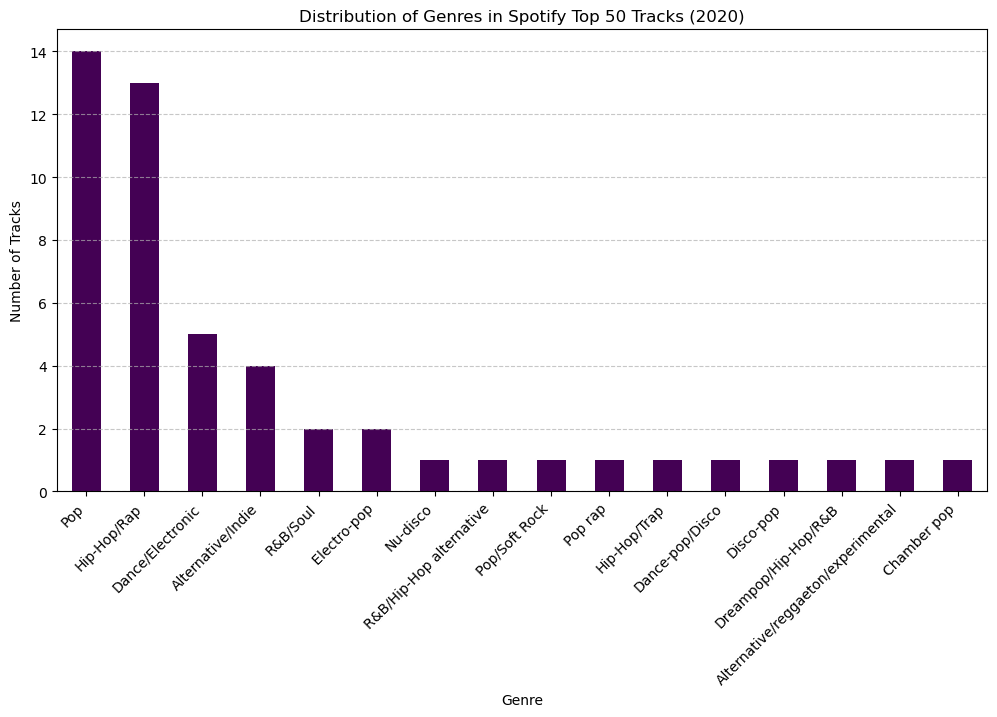

In [19]:
# Count occurrences of each genre
genre_counts = spotify_data_cleaned["genre"].value_counts()

# Plot a bar chart using Pandas' built-in plotting functionality
genre_counts.plot(kind="bar", figsize=(12, 6), title="Distribution of Genres in Spotify Top 50 Tracks (2020)", colormap="viridis")

# Customize the plot
plt.xlabel("Genre")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the chart
plt.show()


### Total unique genres:

In [20]:
# Total number of genres
total_genres = spotify_data_cleaned["genre"].nunique()
print(f"There are {total_genres} unique genres in the top 50.")

There are 16 unique genres in the top 50.


### Genres with only 1 song

In [21]:
# Count occurrences of each genre
genre_counts = spotify_data_cleaned["genre"].value_counts()

# Filter genres that have only one song
genres_with_one_song = genre_counts[genre_counts == 1]

# Convert to DataFrame for better visualization
genres_with_one_song_df = genres_with_one_song.reset_index()

# Rename columns for clarity
genres_with_one_song_df.columns = ["Genre", "Track Count"]

# Display the resulting DataFrame
print("Genres with only one song:")
genres_with_one_song_df


Genres with only one song:


,Genre,Track Count
0,Nu-disco,1
1,R&B/Hip-Hop alternative,1
2,Pop/Soft Rock,1
3,Pop rap,1
4,Hip-Hop/Trap,1
5,Dance-pop/Disco,1
6,Disco-pop,1
7,Dreampop/Hip-Hop/R&B,1
8,Alternative/reggaeton/experimental,1
9,Chamber pop,1


### Correlation Heatmap of Numeric Features
- Biggest positive correlation is between **Loudness** and **Energy** which is **0.79**, it indicates that the louder the music the more energetic it is scored
- the Biggest negative correlation is between **Acusticness** and **Energy** which is -0.68, it mostly confirms that accustic music isn't very energetic
- Other feature correlations are too low and dont provide any value for our analysis

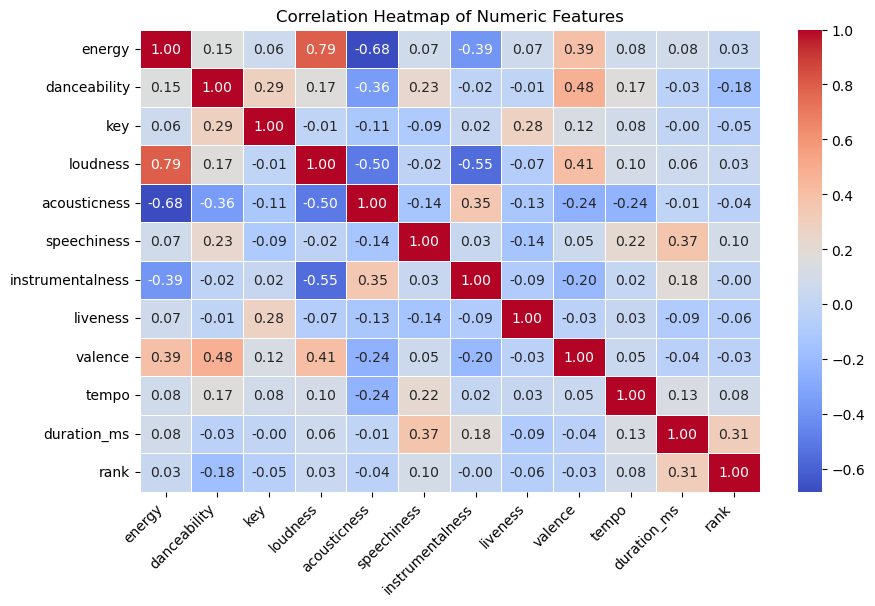

In [22]:
# Select only numeric columns for correlation calculation
numeric_data = spotify_data_cleaned.select_dtypes(include=["float64", "int64"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap with correlation values annotated
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Customize the plot
plt.title("Correlation Heatmap of Numeric Features")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Show the heatmap
plt.show()


## Distribution of track durations in seconds
- It is noticeable that the most popular time for a successful song is between 2.5 - 3.5 minutes

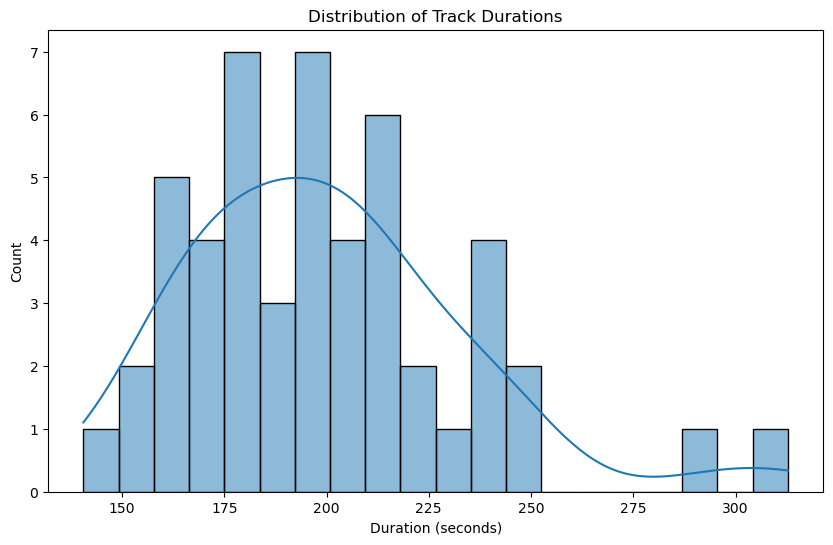

In [23]:
# Convert duration from milliseconds to seconds
spotify_data_cleaned['duration_sec'] = spotify_data_cleaned['duration_ms'] / 1000

# Distribution of track durations (in seconds)
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data_cleaned['duration_sec'], bins=20, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

## Analysis of Danceability, Loudness, and Acousticness by Genre

,Genre,Avg Danceability,Avg Loudness,Avg Acousticness
0,Alternative/Indie,0.661750,-5.421000,0.583500
1,Dance/Electronic,0.755000,-5.338000,0.099440
2,Hip-Hop/Rap,0.765538,-6.917846,0.188741
3,Pop,0.677571,-6.460357,0.323843


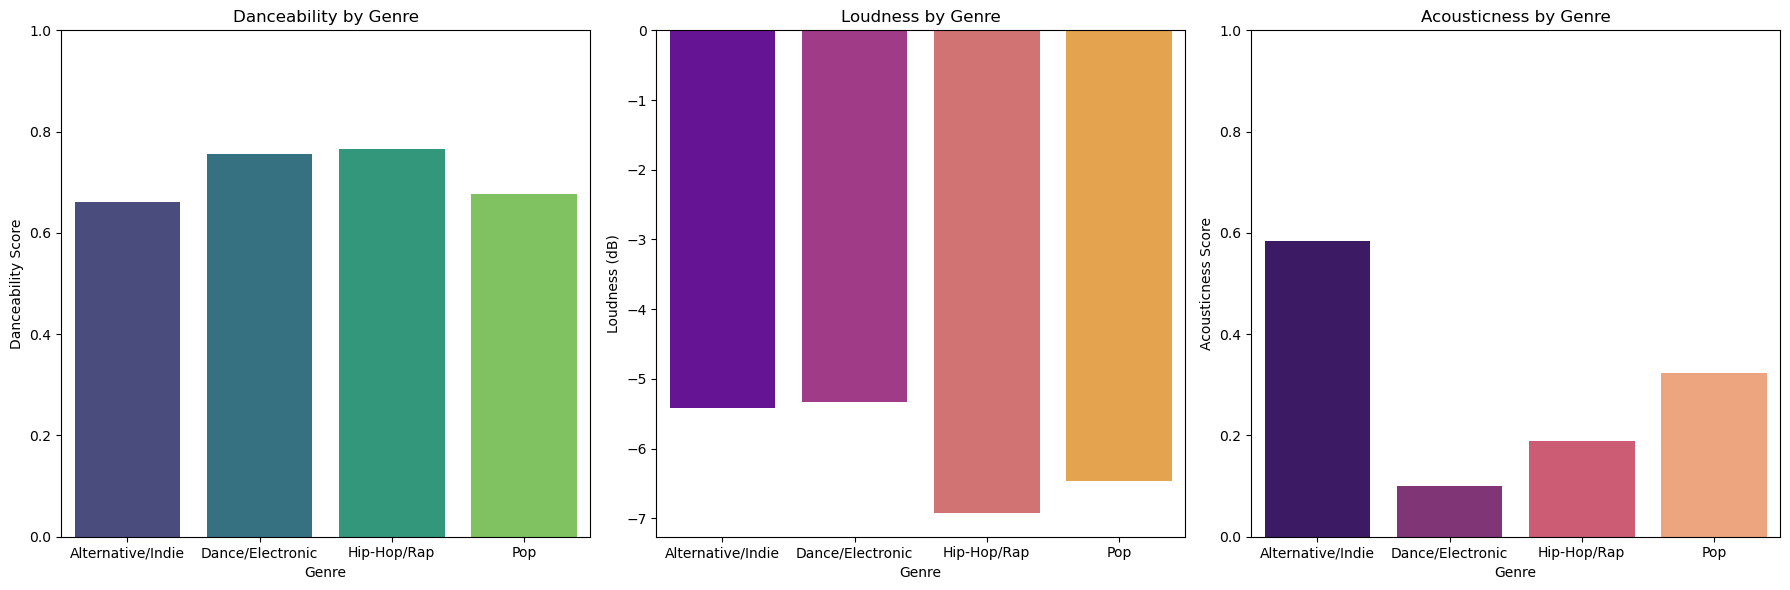

In [26]:
# Genres of interest
genres_of_interest = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

# Filter the dataset to include only the genres of interest
genre_comparison = spotify_data_cleaned[spotify_data_cleaned["genre"].isin(genres_of_interest)]

# Group by genre and calculate mean values for danceability, loudness, and acousticness
genre_means_df = genre_comparison.groupby("genre")[["danceability", "loudness", "acousticness"]].mean().reset_index()

# Rename columns for better clarity
genre_means_df.columns = ["Genre", "Avg Danceability", "Avg Loudness", "Avg Acousticness"]

# Display the resulting DataFrame
display(genre_means_df)

# Visualization of comparisons
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Danceability comparison
sns.barplot(x="Genre", y="Avg Danceability", hue="Genre", data=genre_means_df, ax=axes[0], palette="viridis", legend=False)
axes[0].set_title('Danceability by Genre')
axes[0].set_ylabel('Danceability Score')
axes[0].set_xlabel('Genre')
axes[0].set_ylim(0, 1)

# Loudness comparison
sns.barplot(x="Genre", y="Avg Loudness", hue="Genre", data=genre_means_df, ax=axes[1], palette="plasma", legend=False)
axes[1].set_title('Loudness by Genre')
axes[1].set_ylabel('Loudness (dB)')
axes[1].set_xlabel('Genre')

# Acousticness comparison
sns.barplot(x="Genre", y="Avg Acousticness", hue="Genre", data=genre_means_df, ax=axes[2], palette="magma", legend=False)
axes[2].set_title('Acousticness by Genre')
axes[2].set_ylabel('Acousticness Score')
axes[2].set_xlabel('Genre')
axes[2].set_ylim(0, 1)

# Improve layout
plt.tight_layout()
plt.show()


### 1. Danceability Comparison
- **Dance/Electronic** has the highest danceability score (**0.755**), making it the most dance-friendly genre.
- **Hip-Hop/Rap** follows closely with a score of **0.765**, reflecting its strong rhythmic elements.
- **Pop** music has a moderate danceability score of **0.678**, indicating a balance between rhythm and melody.
- **Alternative/Indie** has the lowest danceability (**0.662**), suggesting that it focuses more on artistic elements rather than rhythm.

**Conclusion:**  
Dance/Electronic and Hip-Hop/Rap genres are the most danceable, while Alternative/Indie is the least.

---

### 2. Loudness Comparison
- **Dance/Electronic** music is the loudest genre at **-5.338 dB**, aligning with its high-energy and club-oriented nature.
- **Alternative/Indie** follows with a loudness of **-5.421 dB**, showing a relatively high volume level.
- **Pop** music has a loudness of **-6.460 dB**, slightly quieter than Dance/Electronic and Alternative/Indie.
- **Hip-Hop/Rap** is the quietest genre at **-6.918 dB**, despite its heavy beats and bass.

**Conclusion:**  
Dance/Electronic music is the loudest, while Hip-Hop/Rap is the quietest.

---

### 3. Acousticness Comparison
- **Alternative/Indie** has the highest acousticness score (**0.583**), reflecting a strong presence of live instruments.
- **Pop** music follows with a score of **0.324**, blending acoustic and electronic elements.
- **Hip-Hop/Rap** has an acousticness of **0.189**, indicating minimal acoustic instrumentation.
- **Dance/Electronic** has the lowest acousticness (**0.099**), relying heavily on synthesized sounds.

**Conclusion:**  
Alternative/Indie is the most acoustic-heavy genre, while Dance/Electronic is the least.


## Main Takeaways from the Analysis:
- **Pop** is the most popular genre in the top 50, it takes 28% of the total top tracks. Hip-Hop being second most popular genre takes 26% of total top songs, these two genres combined are more than half of the top songs genres.
- There are multiple artist appearing multiple times with their songs in the top charts, this could indicate a trend of the Artist which could be caused by first songs to be hits and then after the gained popularity, its easier for them to also expose their other songs. Here are some artists with the most top songs in the top 50:
	Billie Eilish, 
	Dua Lipa, 
	Travis Scott
- Based on the top 50 chart and assuming its descending order represents the ranks of the top list, **Dua Lipa** was the most Successful artist having **3 top songs** and also these 3 songs were from the **same one Album**.
- 64% of the songs had their danceability score higher than 0.7 (1.0 being the max value). This is one of the key factors for a song being popular and successful.
- The most popular average duration for a song was between **2.5 and 3.5 minutes**.